In [1]:
from datetime import datetime
from time import time
import numpy as np
from astropy.io import ascii
from astropy.table import Table
from astropy.coordinates import SkyCoord
import astropy.units as u
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import pickle
import sys

datain = []

In [2]:

try:
    datatab = ascii.read(r"C:\Users\HP\Desktop\Bonn\My Courses\Advanced Lab Course\S262 Interferometry\A5\A5\scans\dec scan A5.txt")

    
except Exception as e:
    print(e)

In [3]:

coords = [SkyCoord(d[0] + " " + d[1], unit=(u.hourangle, u.deg)) for d in
          zip(datatab['col3'], datatab['col4'])]
fluxa = list(datatab['col5'])
fluxb = list(datatab['col8'])
I = list(datatab['col6'])
Q = list(datatab['col7'])
nr = list(datatab['col8'])
coordpair = zip(coords, nr)
loadpickle = 0

In [4]:
pfluxa = [list(f) for f in zip(fluxa, range(len(fluxa)))]
pfluxb = [list(f) for f in zip(fluxb, range(len(fluxb)))]
pQ = [list(f) for f in zip(Q, range(len(Q)))]
pI = [list(f) for f in zip(I, range(len(I)))]

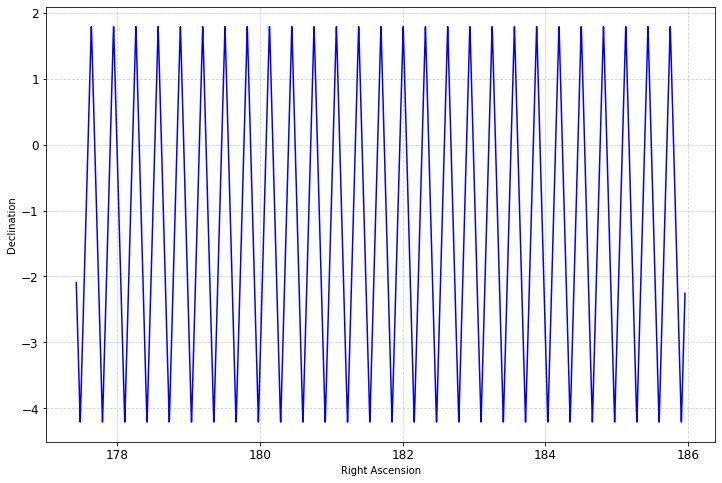

In [5]:
plt.figure(figsize=(12, 8)) 
plt.plot([c.ra.value for c in coords], [c.dec.value for c in coords], color='b', linestyle='-')
plt.xlabel('Right Ascension')
plt.ylabel('Declination')  
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('ravsdec.pdf', format='pdf', bbox_inches='tight')
plt.show()

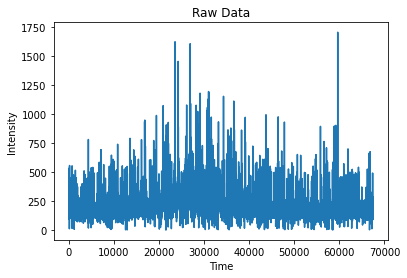

In [6]:
plt.plot(fluxa)
plt.xlabel("Time")
plt.ylabel("Intensity")
plt.title("Raw Data")
plt.show()

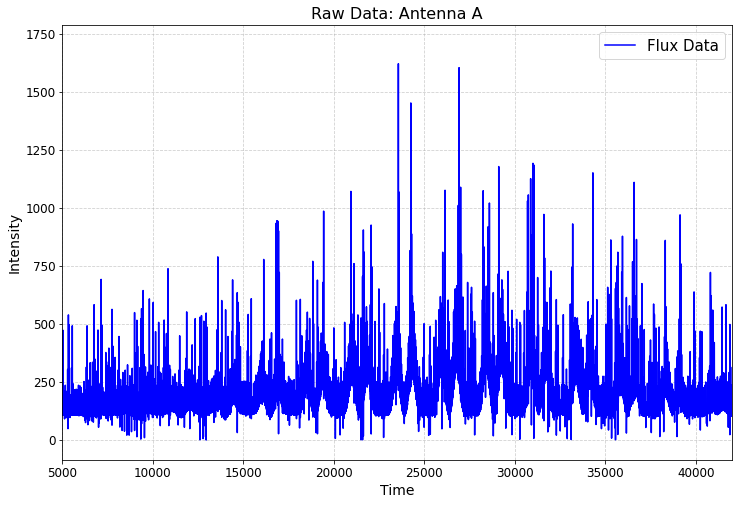

In [7]:
plt.figure(figsize=(12, 8))  
plt.plot(fluxa, color='b', linestyle='-', label='Flux Data')

plt.xlabel("Time", fontsize=14)
plt.ylabel("Intensity", fontsize=14)
plt.title("Raw Data: Antenna A", fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(5000, 42000)

plt.legend(fontsize = 15)
plt.savefig('dec raw a.pdf', format='pdf', bbox_inches='tight')

plt.show()

In [ ]:
plt.figure(figsize=(12, 8))  
plt.plot(fluxa, color='b', linestyle='-', label='Flux Data')

plt.xlabel("Time", fontsize=14)
plt.ylabel("Intensity", fontsize=14)
plt.title("Raw Data: Antenna A", fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(5000, 42000)

plt.legend(fontsize = 15)
plt.savefig('dec raw a.pdf', format='pdf', bbox_inches='tight')

plt.show()

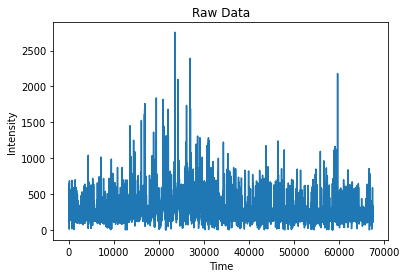

In [8]:
plt.plot(fluxb)
plt.xlabel("Time")
plt.ylabel("Intensity")
plt.title("Raw Data")
plt.show()

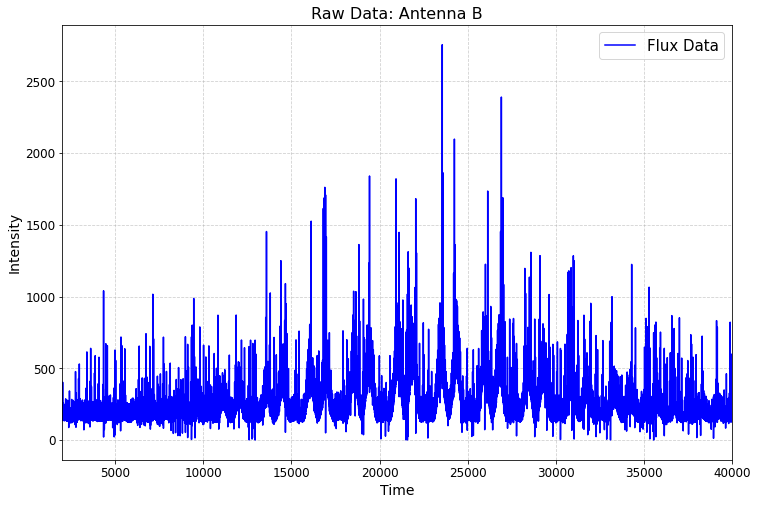

In [9]:
plt.figure(figsize=(12, 8))  
plt.plot(fluxb, color='b', linestyle='-', label='Flux Data')

plt.xlabel("Time", fontsize=14)
plt.ylabel("Intensity", fontsize=14)
plt.title("Raw Data: Antenna B", fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(2000, 40000)

plt.legend(fontsize = 15)
plt.savefig('dec raw b.pdf', format='pdf', bbox_inches='tight')

plt.show()


In [10]:

i=8
while i:
    ind = np.where(abs(fluxa - np.roll(fluxa,1**i)) > 60)[0]
    pfluxa = np.delete(pfluxa,ind,axis=0)
    fluxa = np.delete(fluxa,ind)
    print(len(ind))
    ind = np.where(abs(fluxb - np.roll(fluxb,1**i)) > 60)[0]
    pfluxb = np.delete(pfluxb,ind,axis=0)
    fluxb = np.delete(fluxb,ind)
    ind =np.concatenate(( np.where(abs(Q - np.roll(Q,1**i)) > 30)[0], np.where(abs(I - np.roll(I,1**i)) > 30)[0]))
    pQ = np.delete(pQ,ind,axis=0)
    Q = np.delete(Q,ind)
    pI = np.delete(pI,ind,axis=0)
    I = np.delete(I,ind)
    i-=1

3716
231
36
22
22
22
22
22


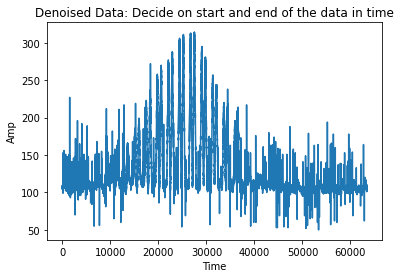

In [11]:
plt.plot(fluxa)
plt.title("Denoised Data: Decide on start and end of the data in time")
plt.xlabel("Time")
plt.ylabel("Amp")
plt.show()

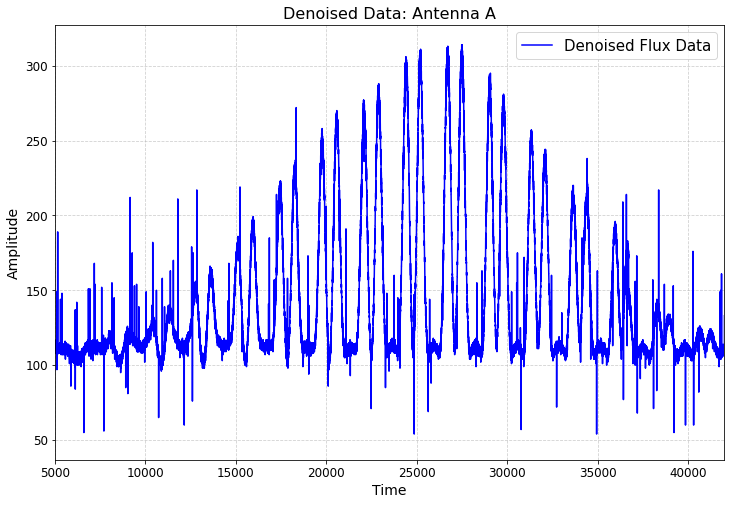

In [12]:
plt.figure(figsize=(12, 8))  
plt.plot(fluxa, color='b', linestyle='-', label='Denoised Flux Data')

plt.xlabel("Time", fontsize=14)
plt.ylabel("Amplitude", fontsize=14)
plt.title("Denoised Data: Antenna A", fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(5000, 42000)

plt.legend(fontsize = 15)
plt.savefig('dec denoised a.pdf', format='pdf', bbox_inches='tight')

plt.show()

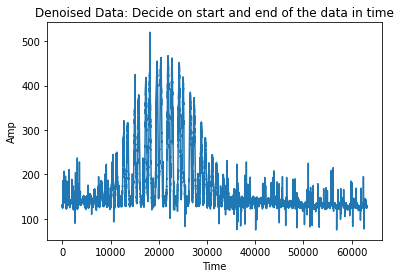

In [13]:
plt.plot(fluxb)
plt.title("Denoised Data: Decide on start and end of the data in time")
plt.xlabel("Time")
plt.ylabel("Amp")
plt.show()


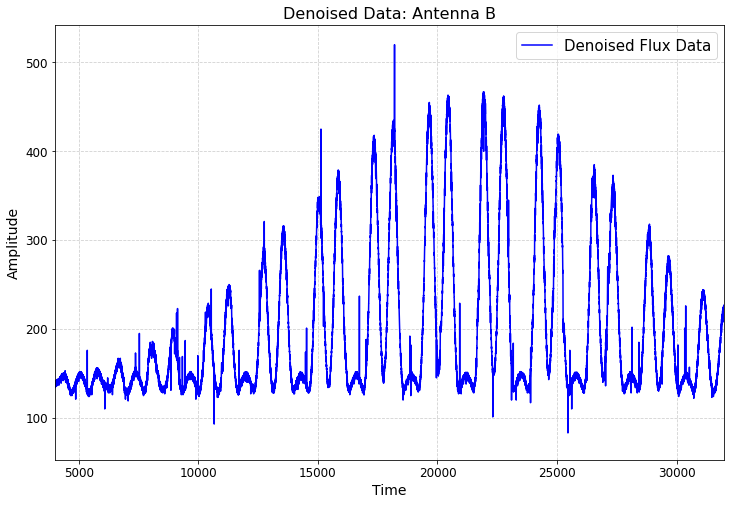

In [14]:
plt.figure(figsize=(12, 8))  
plt.plot(fluxb, color='b', linestyle='-', label='Denoised Flux Data')
\
plt.xlabel("Time", fontsize=14)
plt.ylabel("Amplitude", fontsize=14)
plt.title("Denoised Data: Antenna B", fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(4000, 32000)

plt.legend(fontsize = 15)
plt.savefig('dec denoised b.pdf', format='pdf', bbox_inches='tight')

plt.show()


In [15]:

try:
	print("=== Choose data range after looking at the plot ===")
	data_start = int(5000) 
	data_end =  int(40000) 
	fluxa = fluxa[data_start:data_end] 
	fluxb = fluxb[data_start:data_end]
	Q     = Q[data_start:data_end]
	I     = I[data_start:data_end]
	pfluxa = pfluxa[data_start:data_end]
	pfluxb = pfluxb[data_start:data_end]
	pQ     = pQ[data_start:data_end]
	pI     = pI[data_start:data_end]
	coords = coords[data_start:data_end]
except Exception as e:
	print(e)

=== Choose data range after looking at the plot ===


In [16]:
meanfluxa = np.mean(fluxa)
meanfluxb = np.mean(fluxb)
meanQ = np.mean(Q)
meanI = np.mean(I)


ifluxa = np.interp(range(data_start,data_end),[p[1] for p in pfluxa],[p[0]-meanfluxa for p in pfluxa])
ifluxb = np.interp(range(data_start,data_end),[p[1] for p in pfluxb],[p[0]-meanfluxb for p in pfluxb])
iQ = np.interp(range(data_start,data_end),[p[1] for p in pQ],[p[0]-meanQ for p in pQ])
iI = np.interp(range(data_start,data_end),[p[1] for p in pI],[p[0]-meanI for p in pI])

In [17]:
datdic = {}
for c,fa,fb,ii,qq in zip(coords,ifluxa,ifluxb,iI,iQ):
	try:
		datdic[(c.ra.value,c.dec.value)].append([fa,fb,ii,qq])
		#print "a"
	except:
		datdic[(c.ra.value,c.dec.value)]=[[fa,fb,ii,qq]]

mediandat = {}
dcoords = []
dvalues = []
for d in datdic:
	medi = np.median(datdic[d],axis=0)
	mediandat[d] = medi
	dcoords.append(d)
	dvalues.append(medi)


if loadpickle:
	with open("cleansig.txt",'r') as fin:
		print("Loading pickled file")
		dvalues = pickle.load(fin)
		dcoords = [coords[c[1]] for c in dvalues[0]]

In [18]:

ramax = max([c.ra.value for c  in coords])
ramin = min([c.ra.value for c  in coords])
decmax = max([c.dec.value for c  in coords])
decmin = min([c.dec.value for c  in coords])

grid_ra,grid_dec = np.mgrid[ramin:ramax:50j,decmin:decmax:50j]

tt = str(time())

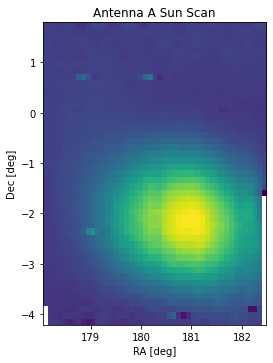

In [19]:

plt.figure(figsize=(4,6))
grid1 = griddata(dcoords,[d[0] for d in dvalues],(grid_ra,grid_dec),method = 'cubic')
plt.imshow(grid1.T[2:-1,2:-1],extent = [ramin,ramax,decmin,decmax])
plt.title("Antenna A Sun Scan")

plt.xlabel("RA [deg]")
plt.ylabel("Dec [deg]")
plt.savefig("7.AntennaAscan1"+tt+".png", dpi=300, bbox_inches='tight')
plt.show()

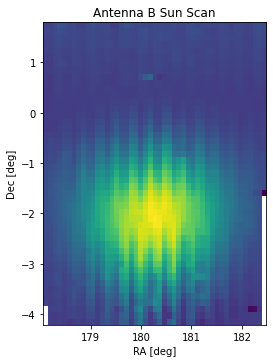

In [20]:
plt.figure(figsize=(4,6))
grid1 = griddata(dcoords,[d[1] for d in dvalues],(grid_ra,grid_dec),method = 'cubic')
plt.imshow(grid1.T[2:-1,2:-1],extent = [ramin,ramax,decmin,decmax])
plt.title("Antenna B Sun Scan")

plt.xlabel("RA [deg]")
plt.ylabel("Dec [deg]")
plt.savefig("8.AntennaBscan1"+tt+".png", dpi=300, bbox_inches='tight')
plt.show()

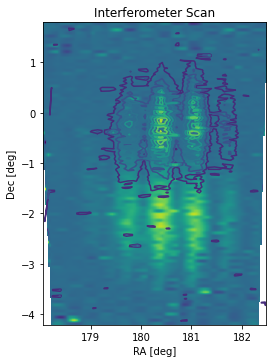

In [21]:
plt.figure(figsize=(4,6))
grid_ra,grid_dec = np.mgrid[ramin:ramax:150j,decmin:decmax:100j]
grid1 = griddata(dcoords,[abs(d[2]+d[3]*1j)**2 for d in dvalues],(grid_ra,grid_dec),method = 'cubic')
plt.imshow(grid1.T[2:-1,2:-1],extent = [ramin,ramax,decmin,decmax])
plt.tricontour([d[0] for d in dcoords],[d[1] for d in dcoords],[abs(d[2]+d[3]*1j)**2 for d in dvalues])
plt.title("Interferometer Scan")

plt.xlabel("RA [deg]")
plt.ylabel("Dec [deg]")
plt.savefig("9.Interfscan1"+tt+".png", dpi=300, bbox_inches='tight')
plt.show()


# Still Scan:


In [22]:
try:
	datatab = ascii.read(r'C:\Users\HP\Desktop\Bonn\My Courses\Advanced Lab Course\S262 Interferometry\A5\A5\scans\stilldata_out.txt')
except Exception as e:
	print(e)

KeyboardInterrupt: 

In [ ]:

coords = [SkyCoord(d[0]+" "+d[1],unit=(u.hourangle,u.deg))  for d in zip(datatab['col3'],datatab['col4'])]

fluxa = list(datatab['col5'])
fluxb = list(datatab['col8'])
I = list(datatab['col6'])
Q = list(datatab['col7'])
nr = list(datatab['col8'])
coordpair = zip(coords,nr)
loadpickle = 0

pfluxa =[list(f) for f in zip(fluxa,range(len(fluxa)))]
pfluxb =[ list(f) for f in zip(fluxb,range(len(fluxb)))]
pQ =[list(f) for f in  zip(Q,range(len(Q)))]
pI =[list(f) for f in  zip(I,range(len(I)))]

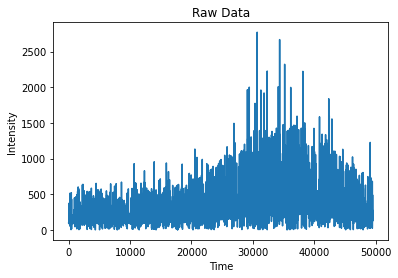

In [ ]:

plt.plot(fluxa)
plt.xlabel("Time")
plt.ylabel("Intensity")
plt.title("Raw Data")
plt.show()

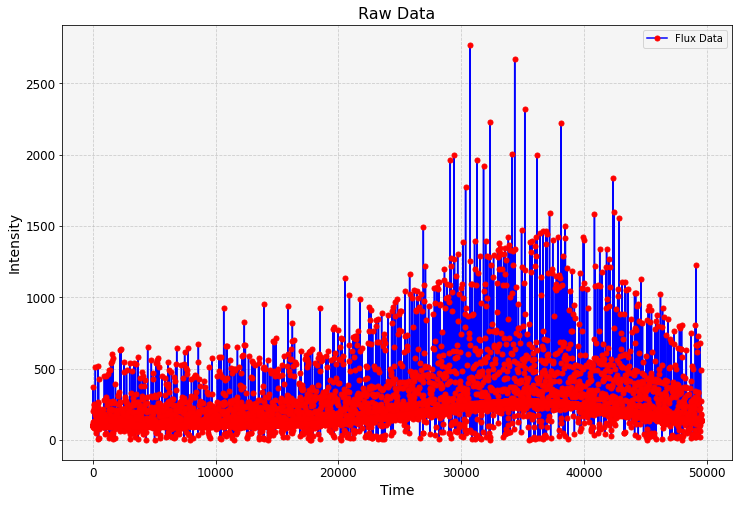

In [ ]:
plt.figure(figsize=(12, 8))  
plt.rcParams['axes.facecolor'] = 'whitesmoke' 
plt.plot(fluxa, color='b', linestyle='-', marker='o', markersize=5, markerfacecolor='r', markeredgecolor='r', label='Flux Data')


plt.xlabel("Time", fontsize=14)
plt.ylabel("Intensity", fontsize=14)
plt.title("Raw Data", fontsize=16)


plt.grid(True, linestyle='--', alpha=0.6)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend()

plt.show()

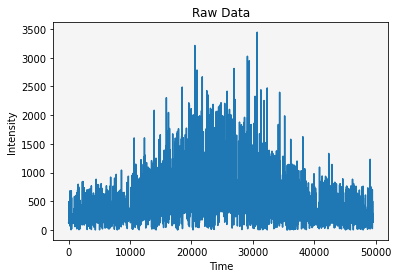

In [ ]:
plt.plot(fluxb)
plt.xlabel("Time")
plt.ylabel("Intensity")
plt.title("Raw Data")
plt.show()

In [ ]:
i=8
while i:
	ind = np.where(abs(fluxa - np.roll(fluxa,1**i)) > 60)[0]
	pfluxa = np.delete(pfluxa,ind,axis=0)
	fluxa = np.delete(fluxa,ind)
	print(len(ind))
	ind = np.where(abs(fluxb - np.roll(fluxb,1**i)) > 60)[0]
	pfluxb = np.delete(pfluxb,ind,axis=0)
	fluxb = np.delete(fluxb,ind)

	ind = np.where(abs(Q - np.roll(Q,1**i)) > 30)[0]
	pQ = np.delete(pQ,ind,axis=0)
	Q = np.delete(Q,ind)
	
	ind = np.where(abs(I - np.roll(I,1**i)) > 30)[0]
	pI = np.delete(pI,ind,axis=0)
	I = np.delete(I,ind)


	i-=1

3365
286
38
20
20
20
20
20


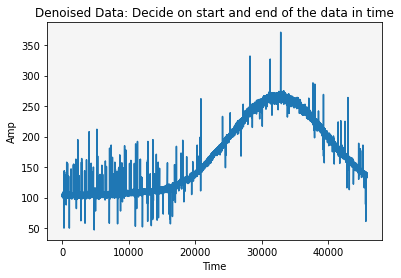

In [ ]:

plt.plot(fluxa)
plt.title("Denoised Data: Decide on start and end of the data in time")
plt.xlabel("Time")
plt.ylabel("Amp")
plt.show()


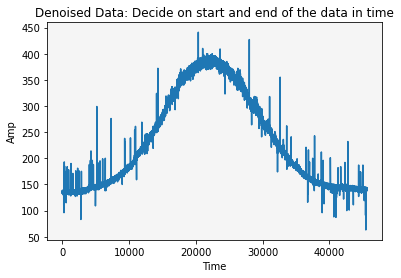

In [ ]:
plt.plot(fluxb)
plt.title("Denoised Data: Decide on start and end of the data in time")
plt.xlabel("Time")
plt.ylabel("Amp")
plt.show()
